In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [3]:
df = pd.read_csv("Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
# Function to categorize status
def categorize_risk(row):
    if row['Status'] == 0:
        return 'Low Risk'
    elif row['Status'] == 1:
        return 'High Risk'

# Apply the function to create a new 'risk_category' column
df['risk_category'] = df.apply(categorize_risk, axis=1)
df


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1,risk_category
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0,High Risk
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN,High Risk
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0,Low Risk
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0,Low Risk
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0,Low Risk
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0,Low Risk
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0,Low Risk
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0,Low Risk


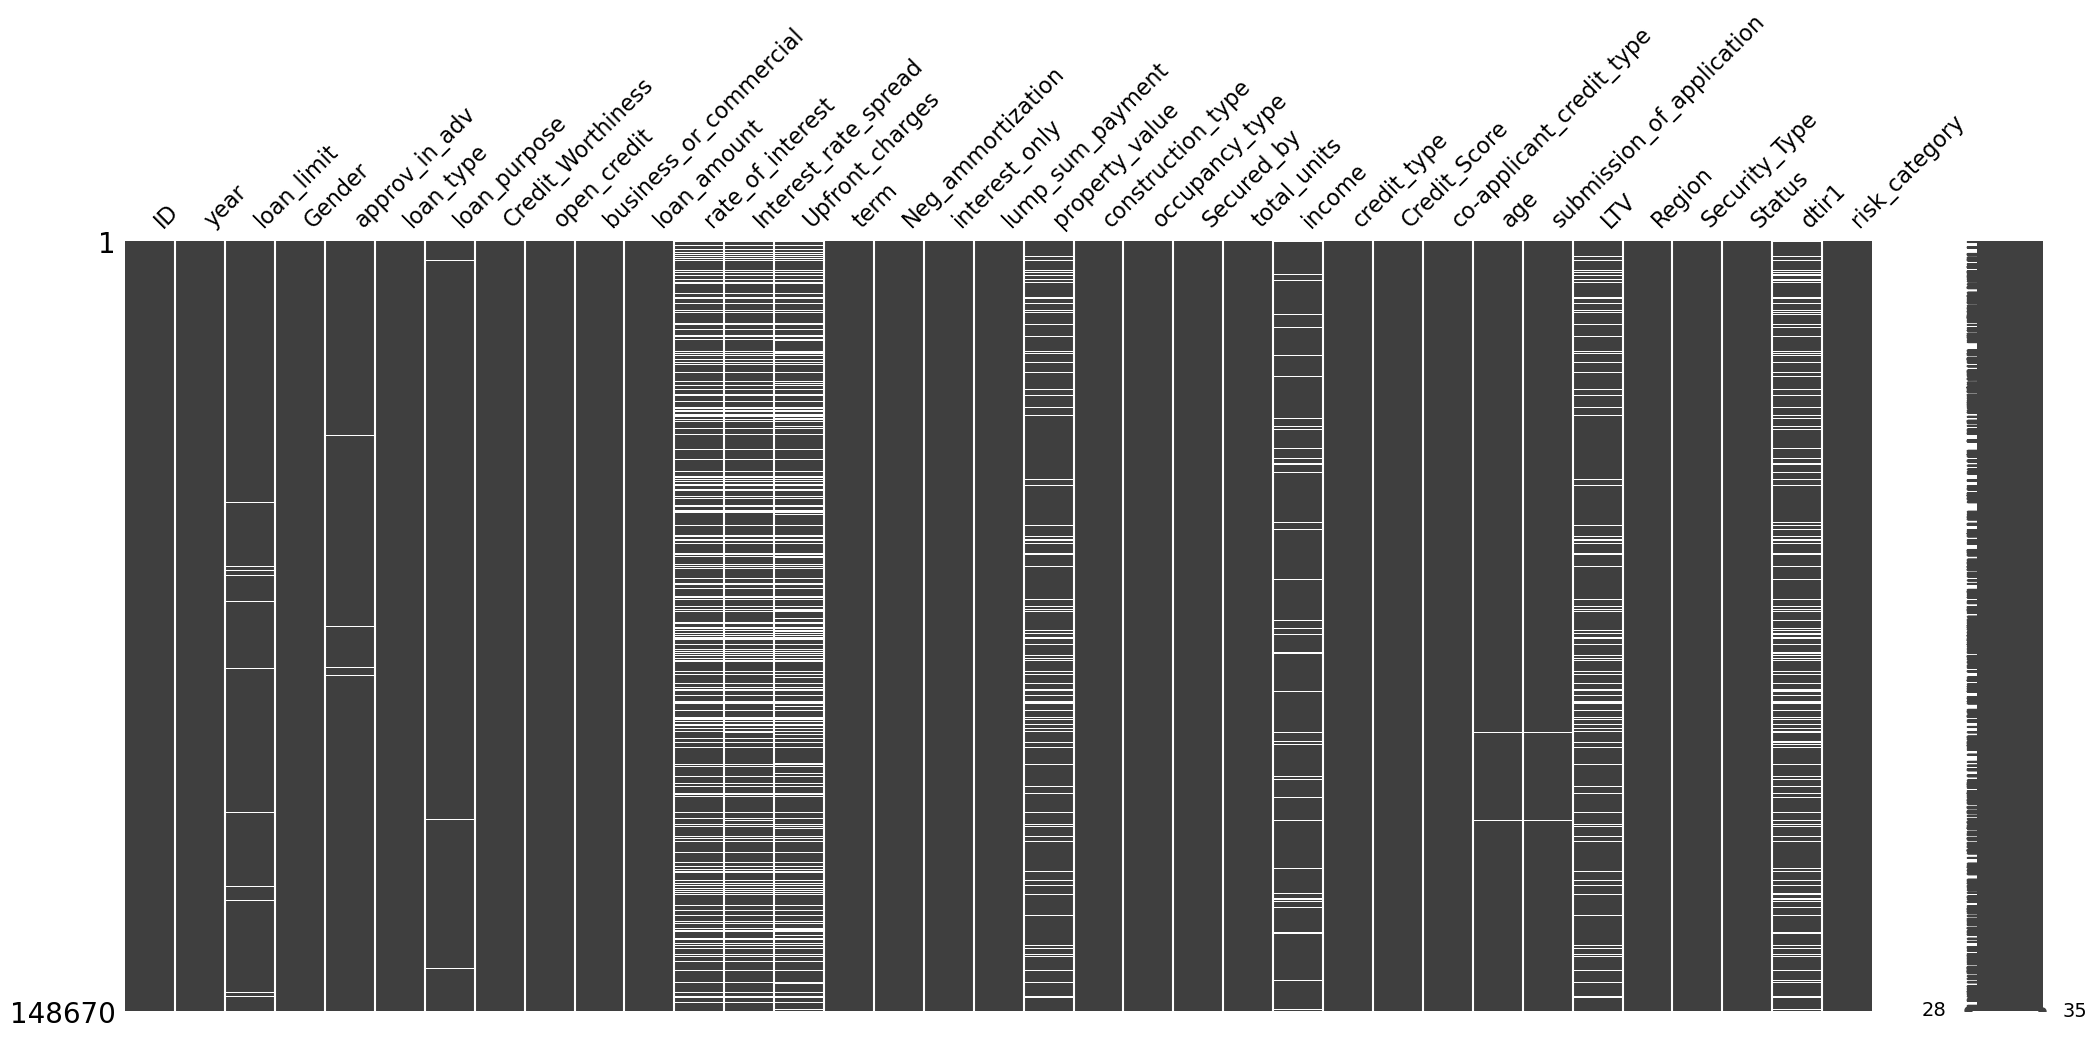

<Figure size 1500x900 with 0 Axes>

In [6]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

In [7]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [8]:
Features_with_NaN=[col for col in df.columns if df[col].isnull().sum()>0]
for column in Features_with_NaN:
    print(column,np.round(df[column].isnull().mean(),2),'% missing values')

loan_limit 0.02 % missing values
approv_in_adv 0.01 % missing values
loan_purpose 0.0 % missing values
rate_of_interest 0.25 % missing values
Interest_rate_spread 0.25 % missing values
Upfront_charges 0.27 % missing values
term 0.0 % missing values
Neg_ammortization 0.0 % missing values
property_value 0.1 % missing values
income 0.06 % missing values
age 0.0 % missing values
submission_of_application 0.0 % missing values
LTV 0.1 % missing values
dtir1 0.16 % missing values


In [9]:
df.nunique()

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

In [10]:
def count_unique_values(data):
    objects = data.select_dtypes(include=['object']).columns
    for col in objects:
        unique = data[col].value_counts()
        print(unique, '\n')
        print('*'*50)
count_unique_values(df)

cf     135348
ncf      9978
Name: loan_limit, dtype: int64 

**************************************************
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64 

**************************************************
nopre    124621
pre       23141
Name: approv_in_adv, dtype: int64 

**************************************************
type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64 

**************************************************
p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64 

**************************************************
l1    142344
l2      6326
Name: Credit_Worthiness, dtype: int64 

**************************************************
nopc    148114
opc        556
Name: open_credit, dtype: int64 

**************************************************
nob/c    127908
b/c       20762
Name: business_or_commercial, dtype: int64 

*******

([<matplotlib.patches.Wedge at 0x7f88f6268760>,
 [Text(-0.008995408754127084, 1.099963218758403, 'North'),
  Text(-0.22036708868183472, -1.077700490036955, 'south'),
  Text(1.0695159326560089, -0.2571685629989551, 'central'),
  Text(1.0996254343670884, -0.0287037296007404, 'North-East')],
 [Text(-0.004906586593160227, 0.5999799375045834, '50.26%'),
  Text(-0.12020023019009166, -0.587836630929248, '43.06%'),
  Text(0.5833723269032776, -0.14027376163579366, '5.85%'),
  Text(0.5997956914729572, -0.015656579782222034, '0.83%')])

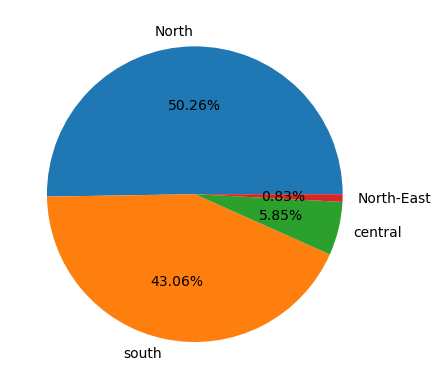

In [11]:
region_names=df.Region.value_counts().index
region_val=df.Region.value_counts().values
plt.pie(region_val,labels=region_names[:],autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x7f88f62c8760>,
 [Text(0.41593847309550813, 1.0183296060701454, 'p3'),
  Text(-1.0201060611602613, -0.4115624180900115, 'p4'),
  Text(0.7103225292004668, -0.8399058902700064, 'p1'),
  Text(1.0973637714591258, -0.07611013788585434, 'p2')],
 [Text(0.22687553077936803, 0.5554525124018974, '37.66%'),
  Text(-0.556421487905597, -0.2244885916854608, '36.89%'),
  Text(0.3874486522911637, -0.4581304856018216, '23.25%'),
  Text(0.598562057159523, -0.04151462066501145, '2.20%')])

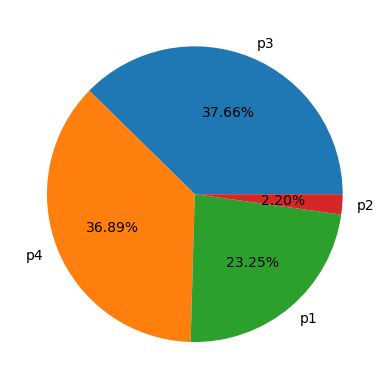

In [12]:
loan_purpose=df.loan_purpose.value_counts().index
val=df.loan_purpose.value_counts().values
plt.pie(val,labels=loan_purpose,autopct='%1.2f%%')

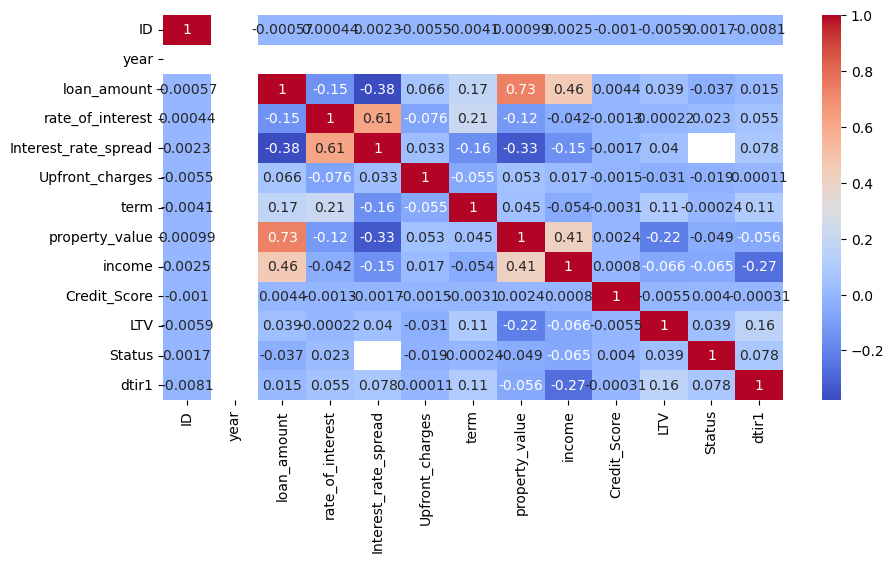

In [13]:
# Get the data types of each column
column_types = df.dtypes

# Select only the numeric columns (assuming 'df' is your DataFrame)
numeric_columns = df.select_dtypes(include=[np.number])

# Create a correlation matrix for the numeric columns
c = numeric_columns.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(c, cmap="coolwarm", annot=True)
plt.show()


In [14]:
df.drop(['ID','year','term','Interest_rate_spread','property_value','submission_of_application'],axis=1,inplace=True)

In [15]:
def detect_outliers(data):
    threshold = 3
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            mean = np.mean(data[i])
            std = np.std(data[i])
            z_scores = [(y - mean) / std for y in data[column]]
            data = data[np.abs(z_scores) <= threshold]
        return data
df = detect_outliers(df)
df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1,risk_category
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,EXP,758,CIB,25-34,98.728814,south,direct,1,45.0,High Risk
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,EQUI,552,EXP,55-64,NaN,North,direct,1,NaN,High Risk
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,EXP,834,CIB,35-44,80.019685,south,direct,0,46.0,Low Risk
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,EXP,587,CIB,45-54,69.376900,North,direct,0,42.0,Low Risk
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,CRIF,602,EXP,25-34,91.886544,North,direct,0,39.0,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,...,CIB,659,EXP,55-64,71.792763,south,direct,0,48.0,Low Risk
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,...,CIB,569,CIB,25-34,74.428934,south,direct,0,15.0,Low Risk
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,...,CIB,702,EXP,45-54,61.332418,North,direct,0,49.0,Low Risk
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,...,EXP,737,EXP,55-64,70.683453,North,direct,0,29.0,Low Risk


In [16]:
# Inputing mull/NaN values
for i in df.columns:       
    if df[i].dtype=='float64' or df[i].dtype=='int64':
        df[i].fillna(df[i].mean(),inplace=True)

    else:
        df[i].fillna(df[i].mode()[0],inplace=True)
        
df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1,risk_category
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,4.045476,...,EXP,758,CIB,25-34,98.728814,south,direct,1,45.000000,High Risk
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,4.045476,...,EQUI,552,EXP,55-64,72.746457,North,direct,1,37.732932,High Risk
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,...,EXP,834,CIB,35-44,80.019685,south,direct,0,46.000000,Low Risk
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,...,EXP,587,CIB,45-54,69.376900,North,direct,0,42.000000,Low Risk
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,...,CRIF,602,EXP,25-34,91.886544,North,direct,0,39.000000,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125000,...,CIB,659,EXP,55-64,71.792763,south,direct,0,48.000000,Low Risk
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190000,...,CIB,569,CIB,25-34,74.428934,south,direct,0,15.000000,Low Risk
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125000,...,CIB,702,EXP,45-54,61.332418,North,direct,0,49.000000,Low Risk
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500000,...,EXP,737,EXP,55-64,70.683453,North,direct,0,29.000000,Low Risk


In [17]:
df.isnull().sum() 

loan_limit                  0
Gender                      0
approv_in_adv               0
loan_type                   0
loan_purpose                0
Credit_Worthiness           0
open_credit                 0
business_or_commercial      0
loan_amount                 0
rate_of_interest            0
Upfront_charges             0
Neg_ammortization           0
interest_only               0
lump_sum_payment            0
construction_type           0
occupancy_type              0
Secured_by                  0
total_units                 0
income                      0
credit_type                 0
Credit_Score                0
co-applicant_credit_type    0
age                         0
LTV                         0
Region                      0
Security_Type               0
Status                      0
dtir1                       0
risk_category               0
dtype: int64

### Data Processing

In [18]:
df['Gender'].replace(['Sex Not Available'],df['Gender'].mode(),inplace=True)

In [19]:
df.to_csv('Preprocessed Data')

In [20]:
print(df.columns)
df.info()

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Upfront_charges',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'LTV', 'Region', 'Security_Type', 'Status', 'dtir1',
       'risk_category'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_limit                148670 non-null  object 
 1   Gender                    148670 non-null  object 
 2   approv_in_adv             148670 non-null  object 
 3   loan_type                 148670 non-null  object 
 4   loan_purpos

In [21]:
from sklearn.preprocessing import LabelEncoder

categorical_cols =df.select_dtypes(include=['object']).columns
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [22]:
#setting target attribute 'Status'
X=df.drop('Status',axis='columns')
Y=df.Status

In [23]:
X

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,dtir1,risk_category
0,0,2,0,0,0,0,0,1,116500,4.045476,...,1740.0,3,758,0,0,98.728814,3,1,45.000000,0
1,0,2,0,1,0,0,0,0,206500,4.045476,...,4980.0,2,552,1,3,72.746457,0,1,37.732932,0
2,0,2,1,0,0,0,0,1,406500,4.560000,...,9480.0,3,834,0,1,80.019685,3,1,46.000000,1
3,0,2,0,0,3,0,0,1,456500,4.250000,...,11880.0,3,587,0,2,69.376900,0,1,42.000000,1
4,0,1,1,0,0,0,0,1,696500,4.000000,...,10440.0,1,602,1,0,91.886544,0,1,39.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,0,2,0,0,2,0,0,1,436500,3.125000,...,7860.0,0,659,1,3,71.792763,3,1,48.000000,1
148666,0,2,0,0,0,0,0,1,586500,5.190000,...,7140.0,0,569,0,0,74.428934,3,1,15.000000,1
148667,0,2,0,0,3,0,0,1,446500,3.125000,...,6900.0,0,702,1,2,61.332418,0,1,49.000000,1
148668,0,0,0,0,3,0,0,1,196500,3.500000,...,7140.0,3,737,1,3,70.683453,0,1,29.000000,1


In [24]:
Y

0         1
1         1
2         0
3         0
4         0
         ..
148665    0
148666    0
148667    0
148668    0
148669    0
Name: Status, Length: 148670, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=True)

In [26]:
X_train

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,dtir1,risk_category
118686,0,2,0,0,2,0,0,1,196500,3.500000,...,6600.000000,3,523,0,0,73.320896,3,1,22.000000,1
4568,0,1,1,0,3,0,0,1,286500,4.375000,...,10860.000000,1,607,1,2,70.220588,0,1,30.000000,1
83187,0,1,1,0,2,0,0,1,476500,2.990000,...,8040.000000,0,634,1,3,47.745491,0,1,36.000000,1
140392,0,2,0,0,3,0,0,1,496500,3.625000,...,10140.000000,0,657,1,1,87.411972,3,1,31.000000,1
142764,0,2,0,2,3,0,0,1,376500,3.490000,...,6957.338876,3,659,1,4,67.473118,3,1,37.732932,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,0,2,0,0,3,0,0,1,586500,4.000000,...,6780.000000,3,576,1,0,68.356643,3,1,39.000000,1
109259,0,2,0,0,3,0,0,1,496500,3.625000,...,9180.000000,0,876,0,2,84.438776,0,1,34.000000,1
50057,0,2,0,1,2,0,0,0,306500,3.990000,...,3900.000000,1,556,0,1,85.614525,3,1,60.000000,1
5192,0,2,0,1,2,0,0,0,316500,5.250000,...,5040.000000,0,679,0,1,88.407821,3,1,56.000000,1


### Applying ML Models

In [27]:
# Applying KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred_knn = knn.predict(X_test)

In [29]:
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy * 100:.2f}%")

K-Nearest Neighbors Accuracy: 92.66%


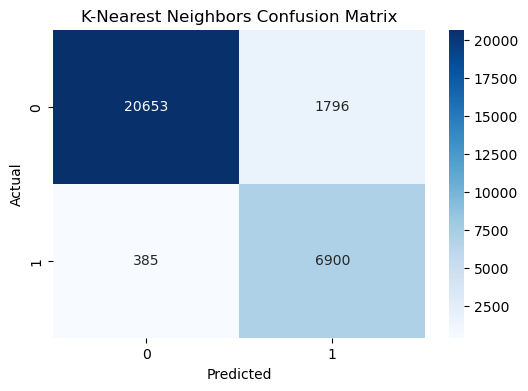

In [31]:
knn_confusion = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(knn_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
# Print KNN classification report
knn_classification_report = classification_report(y_test, y_pred_knn)
print("K-Nearest Neighbors Classification Report:")
print(knn_classification_report)

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     22449
           1       0.79      0.95      0.86      7285

    accuracy                           0.93     29734
   macro avg       0.89      0.93      0.91     29734
weighted avg       0.94      0.93      0.93     29734



In [33]:
# Applying Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_test)

In [34]:
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian Naive Bayes Accuracy: {gnb_accuracy * 100:.2f}%")

Gaussian Naive Bayes Accuracy: 90.91%


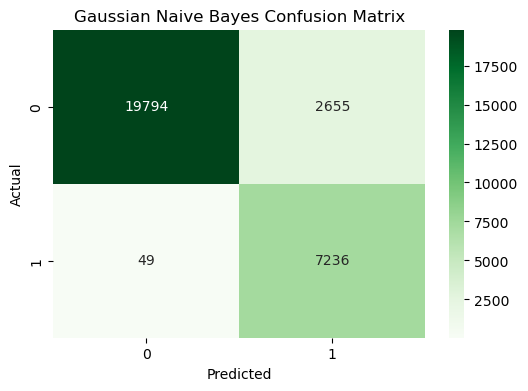

In [35]:
gnb_confusion = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(6, 4))
sns.heatmap(gnb_confusion, annot=True, fmt='d', cmap='Greens')
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

RISK STRATEFICATION

In [36]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [37]:
rf_predictions = rf_model.predict(X_test)

In [38]:
rf_predictions 

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Classifier: {rf_accuracy * 100:.2f}%")

Random Forest Classifier: 100.00%


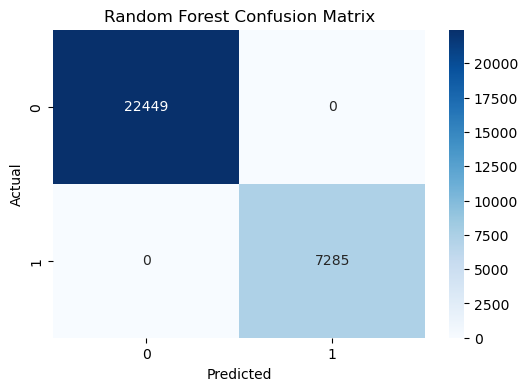

In [40]:
rf_confusion = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
# Print rf classification report
rf_classification_report = classification_report(y_test, rf_predictions)
print("Random Forest Classification Report:")
print(rf_classification_report)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22449
           1       1.00      1.00      1.00      7285

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



In [42]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [43]:
gb_predictions = gb_model.predict(X_test)
gb_predictions 

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f"Gradient Boosting Classifier: {gb_accuracy * 100:.2f}%")

Gradient Boosting Classifier: 100.00%


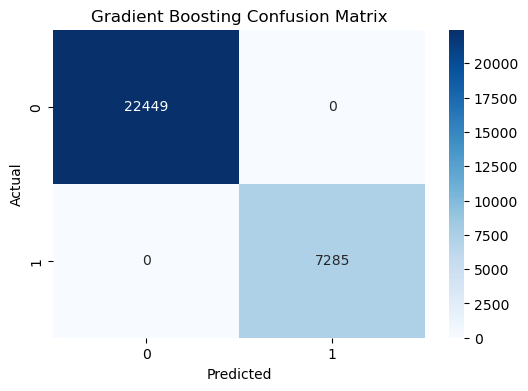

In [45]:
gb_confusion = confusion_matrix(y_test, gb_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(gb_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [46]:
# Print gb classification report
gb_classification_report = classification_report(y_test, gb_predictions)
print("Gradient Boosting Classification Report:")
print(gb_classification_report)

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22449
           1       1.00      1.00      1.00      7285

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



In [56]:
from fairlearn.metrics import demographic_parity_difference

# Evaluate fairness using demographic parity difference
gender_column = X_test['Gender']  # Replace with the actual column containing gender information
region_column = X_test['Region']  # Replace with the actual column containing region information
age_column = X_test['age'] 

demographic_parity_diff_gender = demographic_parity_difference(y_test, rf_predictions, sensitive_features=gender_column)
demographic_parity_diff_region = demographic_parity_difference(y_test, rf_predictions, sensitive_features=region_column)
demographic_parity_diff_age = demographic_parity_difference(y_test, rf_predictions, sensitive_features=age_column)

print("Demographic Parity Difference (Gender):", demographic_parity_diff_gender)
print("Demographic Parity Difference (Region):", demographic_parity_diff_region)
print("Demographic Parity Difference (age):", demographic_parity_diff_age)


Demographic Parity Difference (Gender): 0.089267836435696
Demographic Parity Difference (Region): 0.06562822378214542
Demographic Parity Difference (age): 0.0941141038476879


In [55]:
from fairlearn.metrics import equalized_odds_difference

# Assuming 'age' is a continuous variable
# Convert 'age' to binary based on a threshold
age_threshold = 30  # Adjust the threshold as needed
age_column_binary = (X_test['age'] > age_threshold).astype(int)

# Evaluate fairness using equalized odds difference
equalized_odds_diff_age = equalized_odds_difference(y_test, rf_predictions, sensitive_features=age_column_binary)

print("Equalized Odds Difference (Age):", equalized_odds_diff_age)


Equalized Odds Difference (Age): 0.0
